# Image Classification using MobileNetV2 + ImageNet weights

## Import Library

In [ ]:
import os
import os.path
import shutil
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import random

## Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path= Path('/content/drive/MyDrive/Bangkit/Dataset/')

## Inisiasi Model MobilenetV2

In [ ]:
mobilenetv2_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=True,
    weights='imagenet',
)

In [ ]:
for layer in mobilenetv2_model.layers:
    layer.trainable=False

In [ ]:
mobilenetv2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
last_layer = mobilenetv2_model.get_layer('global_average_pooling2d')

last_output = last_layer.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)
model = Model(mobilenetv2_model.input, x)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

## Membuat Set Data

In [ ]:
base_dir = image_path
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
one_dir = os.path.join(base_dir, 'one')
two_dir = os.path.join(base_dir, 'two')
three_dir = os.path.join(base_dir, 'three')
four_dir = os.path.join(base_dir, 'four')
five_dir = os.path.join(base_dir, 'five')

In [ ]:
train_one = os.path.join(train_dir, 'one')
val_one = os.path.join(validation_dir, 'one')

train_two = os.path.join(train_dir, 'two')
val_two = os.path.join(validation_dir, 'two')

train_three = os.path.join(train_dir, 'three')
val_three = os.path.join(validation_dir, 'three')

train_four = os.path.join(train_dir, 'four')
val_four = os.path.join(validation_dir, 'four')

train_five = os.path.join(train_dir, 'five')
val_five = os.path.join(validation_dir, 'five')

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
list_directory=[train_dir,validation_dir,train_one,val_one,
                train_two,val_two,train_three,val_three, train_four, val_four, train_five, val_five]
for i in list_directory:
  os.mkdir(i)

In [ ]:
train_one_dir, val_one_dir = train_test_split(os.listdir(one_dir), test_size = 0.30)
train_two_dir, val_two_dir = train_test_split(os.listdir(two_dir), test_size = 0.30)
train_three_dir, val_three_dir = train_test_split(os.listdir(three_dir), test_size = 0.30)
train_four_dir, val_four_dir = train_test_split(os.listdir(four_dir), test_size = 0.30)
train_five_dir, val_five_dir = train_test_split(os.listdir(five_dir), test_size = 0.30)

for file in train_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(train_one, file))
for file in train_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(train_two,file))
for file in train_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(train_three,file))
for file in train_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(train_four,file))
for file in train_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(train_five,file))
for file in val_one_dir:
  shutil.copy(os.path.join(one_dir, file), os.path.join(val_one, file))
for file in val_two_dir:
  shutil.copy(os.path.join(two_dir,file), os.path.join(val_two,file))
for file in val_three_dir:
  shutil.copy(os.path.join(three_dir,file), os.path.join(val_three,file))
for file in val_four_dir:
  shutil.copy(os.path.join(four_dir,file), os.path.join(val_four,file))
for file in val_five_dir:
  shutil.copy(os.path.join(five_dir,file), os.path.join(val_five,file))

# Flow from Directory

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                    target_size = (224, 224),
                                                    batch_size = 4,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                                              target_size = (224, 224),
                                                              batch_size = 4,
                                                              class_mode = 'categorical')

Found 1706 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


## fit

In [ ]:
history = model.fit(train_generator, 
                    epochs=100,
                    steps_per_epoch = 32,
                    validation_data = validation_generator,
                    validation_steps = 5, 
                    verbose = 2)

Epoch 1/100
32/32 - 10s - loss: 1.6383 - accuracy: 0.2656 - val_loss: 1.6118 - val_accuracy: 0.2500 - 10s/epoch - 301ms/step
Epoch 2/100
32/32 - 9s - loss: 1.4402 - accuracy: 0.3516 - val_loss: 1.6560 - val_accuracy: 0.3500 - 9s/epoch - 289ms/step
Epoch 3/100
32/32 - 9s - loss: 1.3897 - accuracy: 0.3672 - val_loss: 1.3973 - val_accuracy: 0.2000 - 9s/epoch - 291ms/step
Epoch 4/100
32/32 - 9s - loss: 1.4592 - accuracy: 0.3672 - val_loss: 1.5264 - val_accuracy: 0.3000 - 9s/epoch - 285ms/step
Epoch 5/100
32/32 - 9s - loss: 1.4683 - accuracy: 0.3984 - val_loss: 1.2598 - val_accuracy: 0.4500 - 9s/epoch - 282ms/step
Epoch 6/100
32/32 - 9s - loss: 1.4116 - accuracy: 0.3828 - val_loss: 1.4714 - val_accuracy: 0.3500 - 9s/epoch - 284ms/step
Epoch 7/100
32/32 - 9s - loss: 1.3337 - accuracy: 0.3984 - val_loss: 1.6088 - val_accuracy: 0.3500 - 9s/epoch - 279ms/step
Epoch 8/100
32/32 - 9s - loss: 1.3626 - accuracy: 0.4453 - val_loss: 1.4498 - val_accuracy: 0.4500 - 9s/epoch - 282ms/step
Epoch 9/100
32

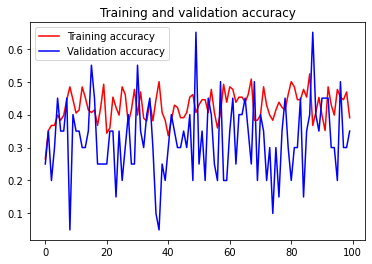

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## MobileNetV2

# Image Classification using ResNET


In [ ]:
resnet50_model = tf.keras.applications.resnet50.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet50_model.layers:
    layer.trainable=False

In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
last_layer = resnet50_model.get_layer('conv5_block3_3_conv')

last_output = last_layer.output

In [ ]:
# x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Conv2D(64, (4,4), activation='relu')(last_output)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)
model2 = Model(resnet50_model.input, x)


In [ ]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                    target_size = (224, 224),
                                                    batch_size = 16,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                                              target_size = (224, 224),
                                                              batch_size = 16,
                                                              class_mode = 'categorical')

Found 1706 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [ ]:
history = model2.fit(train_generator, 
                    epochs=100,
                    steps_per_epoch = 32,
                    validation_data = validation_generator,
                    validation_steps = 5, 
                    verbose = 2)

Epoch 1/100
32/32 - 28s - loss: 1.4952 - accuracy: 0.3730 - val_loss: 1.4711 - val_accuracy: 0.3500 - 28s/epoch - 885ms/step
Epoch 2/100
32/32 - 25s - loss: 1.5026 - accuracy: 0.3496 - val_loss: 1.4374 - val_accuracy: 0.4000 - 25s/epoch - 772ms/step
Epoch 3/100
32/32 - 23s - loss: 1.4961 - accuracy: 0.3691 - val_loss: 1.4841 - val_accuracy: 0.4000 - 23s/epoch - 725ms/step
Epoch 4/100
32/32 - 24s - loss: 1.4705 - accuracy: 0.3398 - val_loss: 1.4048 - val_accuracy: 0.4875 - 24s/epoch - 737ms/step
Epoch 5/100
32/32 - 23s - loss: 1.4372 - accuracy: 0.3906 - val_loss: 1.4956 - val_accuracy: 0.3500 - 23s/epoch - 712ms/step
Epoch 6/100
32/32 - 21s - loss: 1.4746 - accuracy: 0.3438 - val_loss: 1.5062 - val_accuracy: 0.2750 - 21s/epoch - 666ms/step
Epoch 7/100
32/32 - 24s - loss: 1.4414 - accuracy: 0.3945 - val_loss: 1.4914 - val_accuracy: 0.3375 - 24s/epoch - 755ms/step
Epoch 8/100
32/32 - 22s - loss: 1.4639 - accuracy: 0.3555 - val_loss: 1.4930 - val_accuracy: 0.3625 - 22s/epoch - 689ms/step


# Test

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(224, 224))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)

# Image Classification using InceptionV3

In [ ]:
inceptionv3_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inceptionv3_model.layers:
    layer.trainable=False

In [ ]:
inceptionv3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_12[0][0]']              
 alization)                     )                                                      

In [ ]:
last_layer = inceptionv3_model.get_layer('mixed10')

last_output = last_layer.output

In [ ]:
# x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
# x = tf.keras.layers.Conv2D(64, (4,4), activation='relu')(last_output)
# x = tf.keras.layers.MaxPooling2D()(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)
model3 = Model(inceptionv3_model.input, x)

In [ ]:
model3.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_12[0][0]']              
 alization)                     )                                                           

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                    target_size = (224, 224),
                                                    batch_size = 4,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                                              target_size = (224, 224),
                                                              batch_size = 4,
                                                              class_mode = 'categorical')

Found 1706 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [ ]:
history = model3.fit(train_generator, 
                    epochs=100,
                    steps_per_epoch = 32,
                    validation_data = validation_generator,
                    validation_steps = 5, 
                    verbose = 2)

Epoch 1/100
32/32 - 32s - loss: 1.6449 - accuracy: 0.3438 - val_loss: 21035.7344 - val_accuracy: 0.1000 - 32s/epoch - 1s/step
Epoch 2/100
32/32 - 6s - loss: 1.5257 - accuracy: 0.3438 - val_loss: 12504.1465 - val_accuracy: 0.2000 - 6s/epoch - 179ms/step
Epoch 3/100
32/32 - 6s - loss: 1.5484 - accuracy: 0.2891 - val_loss: 20888.8809 - val_accuracy: 0.1500 - 6s/epoch - 179ms/step
Epoch 4/100
32/32 - 6s - loss: 1.4968 - accuracy: 0.3125 - val_loss: 89756.6094 - val_accuracy: 0.1500 - 6s/epoch - 179ms/step
Epoch 5/100
32/32 - 6s - loss: 1.4610 - accuracy: 0.3203 - val_loss: 1684.6783 - val_accuracy: 0.5000 - 6s/epoch - 180ms/step
Epoch 6/100
32/32 - 6s - loss: 1.4526 - accuracy: 0.4297 - val_loss: 300.0694 - val_accuracy: 0.2500 - 6s/epoch - 177ms/step
Epoch 7/100
32/32 - 6s - loss: 1.5321 - accuracy: 0.3594 - val_loss: 9.3451 - val_accuracy: 0.1500 - 6s/epoch - 179ms/step
Epoch 8/100
32/32 - 6s - loss: 1.5445 - accuracy: 0.2422 - val_loss: 68.7619 - val_accuracy: 0.0000e+00 - 6s/epoch - 18

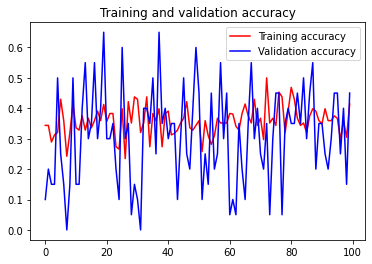

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Image Classification using EfficientNetV2S

In [ ]:
efficientnetv2s_model = tf.keras.applications.EfficientNetV2S(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
)

82436096/82420632 [==============================] - 1s 0us/step


In [ ]:
for layer in efficientnetv2s_model.layers:
    layer.trainable=False

In [ ]:
efficientnetv2s_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [ ]:
last_layer = efficientnetv2s_model.get_layer('top_activation')

last_output = last_layer.output

In [ ]:
img_augmentation = tf.keras.Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
x = efficientnetv2s_model(x)
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2, name="top_dropout")(x)
x = layers.Dense(5, activation="softmax", name="pred")(x)
# model4 = Model(efficientnetv2s_model.input, x)
model4 = Model(inputs, x)

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/train',
                                                    target_size = (224, 224),
                                                    batch_size = 8,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/Bangkit/Dataset/val',
                                                              target_size = (224, 224),
                                                              batch_size = 8,
                                                              class_mode = 'categorical')

Found 1706 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [ ]:
history = model3.fit(train_generator, 
                    epochs=50,
                    steps_per_epoch = 48,
                    validation_data = validation_generator,
                    validation_steps = 20, 
                    verbose = 2)

Epoch 1/50
48/48 - 16s - loss: 1.4401 - accuracy: 0.3942 - val_loss: 1.3536 - val_accuracy: 0.4250 - 16s/epoch - 339ms/step
Epoch 2/50
48/48 - 17s - loss: 1.4545 - accuracy: 0.3568 - val_loss: 1.4153 - val_accuracy: 0.4750 - 17s/epoch - 344ms/step
Epoch 3/50
48/48 - 16s - loss: 1.4392 - accuracy: 0.3984 - val_loss: 1.7304 - val_accuracy: 0.3250 - 16s/epoch - 334ms/step
Epoch 4/50
48/48 - 16s - loss: 1.4327 - accuracy: 0.3598 - val_loss: 2.1974 - val_accuracy: 0.3000 - 16s/epoch - 334ms/step
Epoch 5/50
48/48 - 17s - loss: 1.4822 - accuracy: 0.3490 - val_loss: 3.1600 - val_accuracy: 0.4000 - 17s/epoch - 345ms/step
Epoch 6/50
48/48 - 16s - loss: 1.4335 - accuracy: 0.4101 - val_loss: 1.3908 - val_accuracy: 0.4000 - 16s/epoch - 341ms/step
Epoch 7/50
48/48 - 16s - loss: 1.4453 - accuracy: 0.3932 - val_loss: 1.2299 - val_accuracy: 0.5250 - 16s/epoch - 342ms/step
Epoch 8/50
48/48 - 17s - loss: 1.4881 - accuracy: 0.3646 - val_loss: 1.3417 - val_accuracy: 0.5250 - 17s/epoch - 345ms/step
Epoch 9/

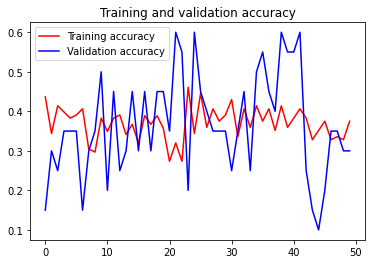

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()